In [2]:
# Load data
import json
import numpy as np

# load file
with open('iris.json') as iris_file:
    iris = json.load(iris_file)
    
# print info about dataset
print('Datatype:', type(iris))
print('Keys:', iris.keys())
print('Attributes:', iris.get('attributes'))
print('Labels:', iris.get('target_names'))
print('Number of samples:', len(iris.get('targets')))

# print example entry
X = np.array(iris.get('data')).astype(np.float)
Y = np.array(iris.get('targets')).astype(np.int)
example_num = 42
print()
print('Example data:', X[example_num])
print('Example target:', Y[example_num])




Datatype: <class 'dict'>
Keys: dict_keys(['attributes', 'data', 'target_names', 'targets'])
Attributes: ['sepal length', 'sepal width', 'petal length', 'petal width']
Labels: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Number of samples: 150

Example data: [4.4 3.2 1.3 0.2]
Example target: 0


In [19]:
X.dtype

dtype('float64')

<IPython.core.display.Javascript object>


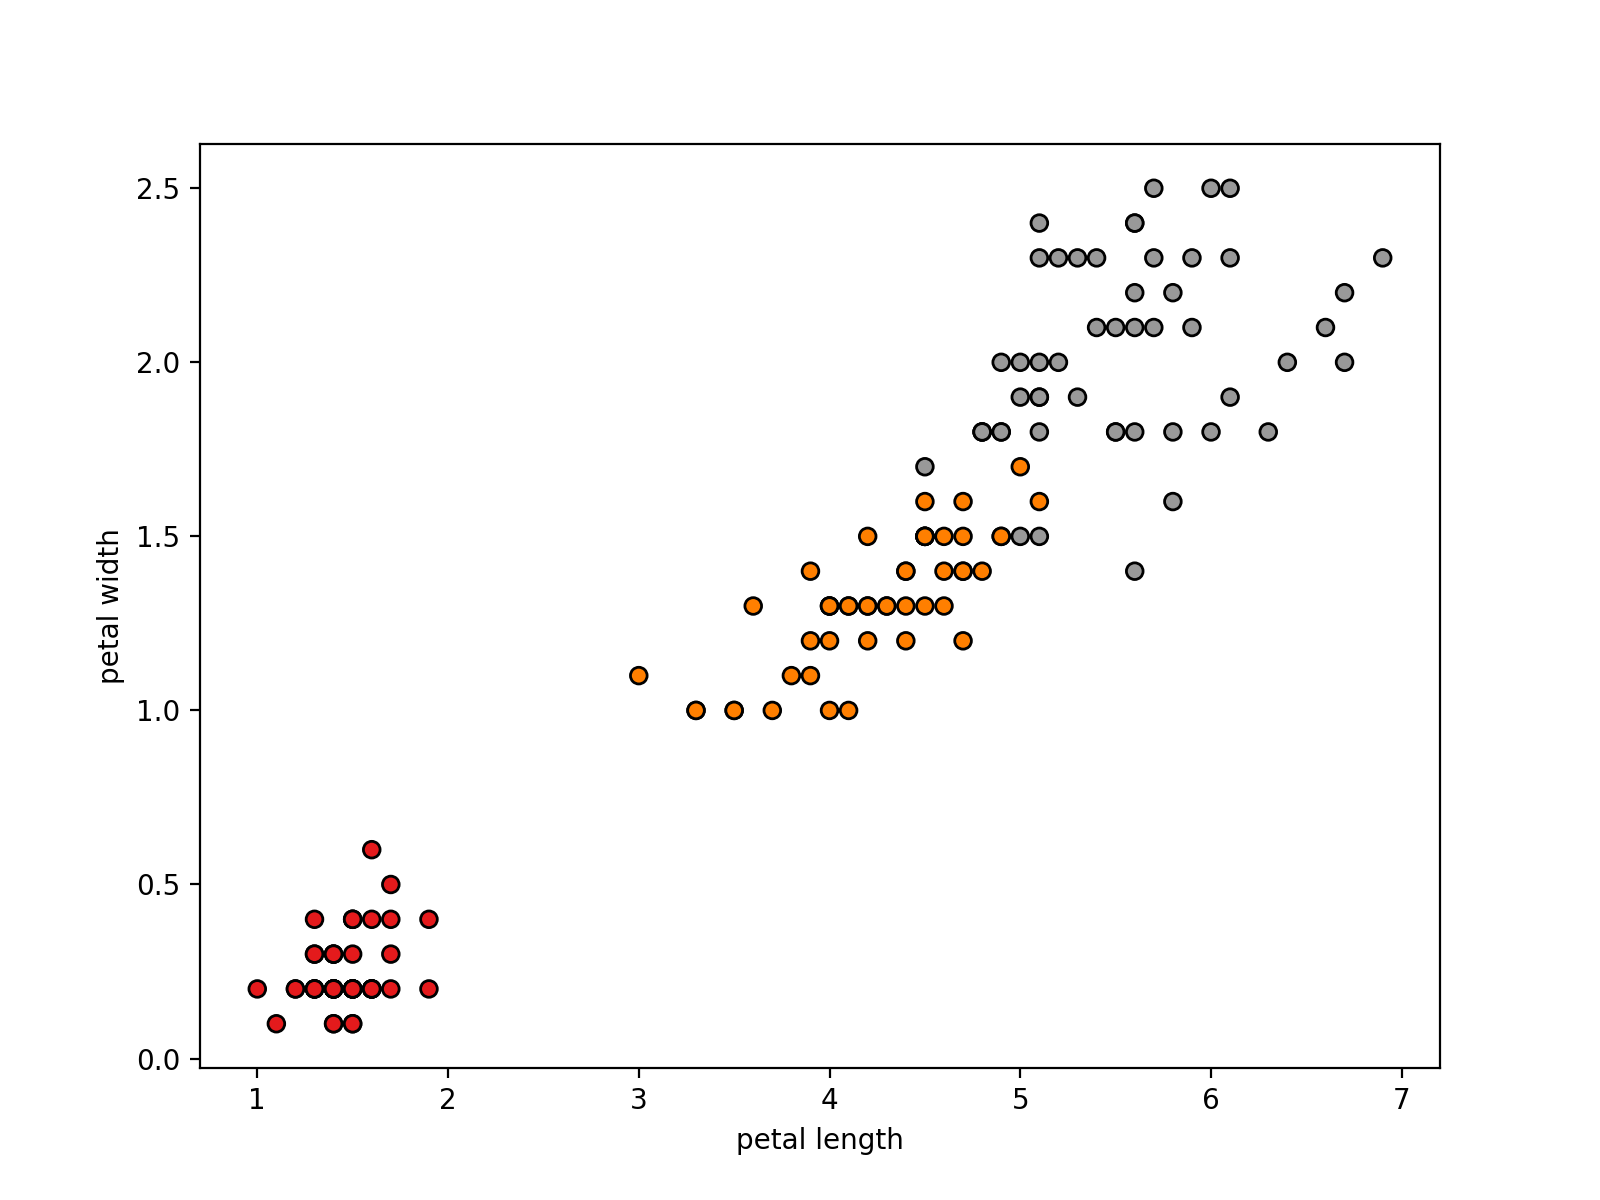

In [3]:
# Visualize data partially

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

attr_num1 = 2
attr_num2 = 3

x_min, x_max = X[:, attr_num1].min() - .5, X[:, attr_num1].max() + .5
y_min, y_max = X[:, attr_num2].min() - .5, X[:, attr_num2].max() + .5

plt.scatter(X[:,attr_num1], X[:,attr_num2], c=Y, cmap=plt.cm.Set1, edgecolor='k')
#TODO legend
#plt.legend(iris.get('target_names'), cmap=plt.cm.Set1)
plt.xlabel(iris.get('attributes')[attr_num1])
plt.ylabel(iris.get('attributes')[attr_num2])
plt.show()

<IPython.core.display.Javascript object>


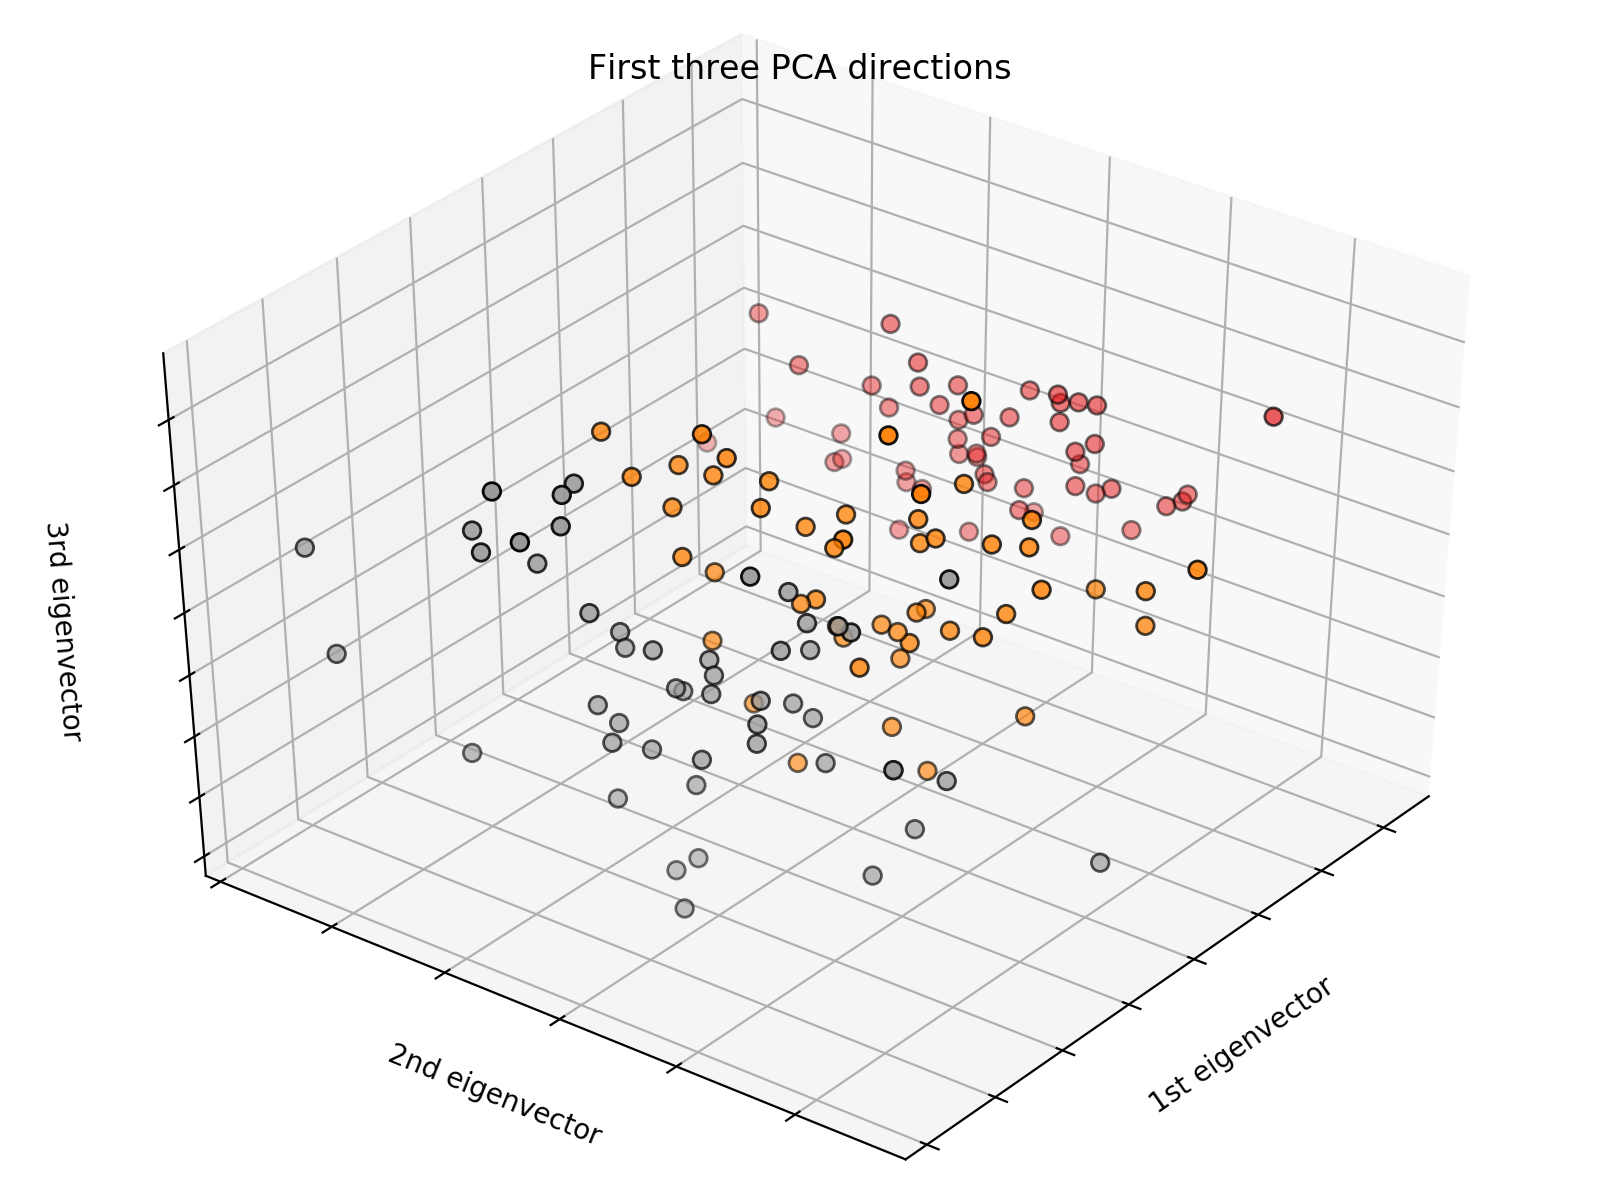

In [4]:
# PCA to visualize data completely

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()




<IPython.core.display.Javascript object>


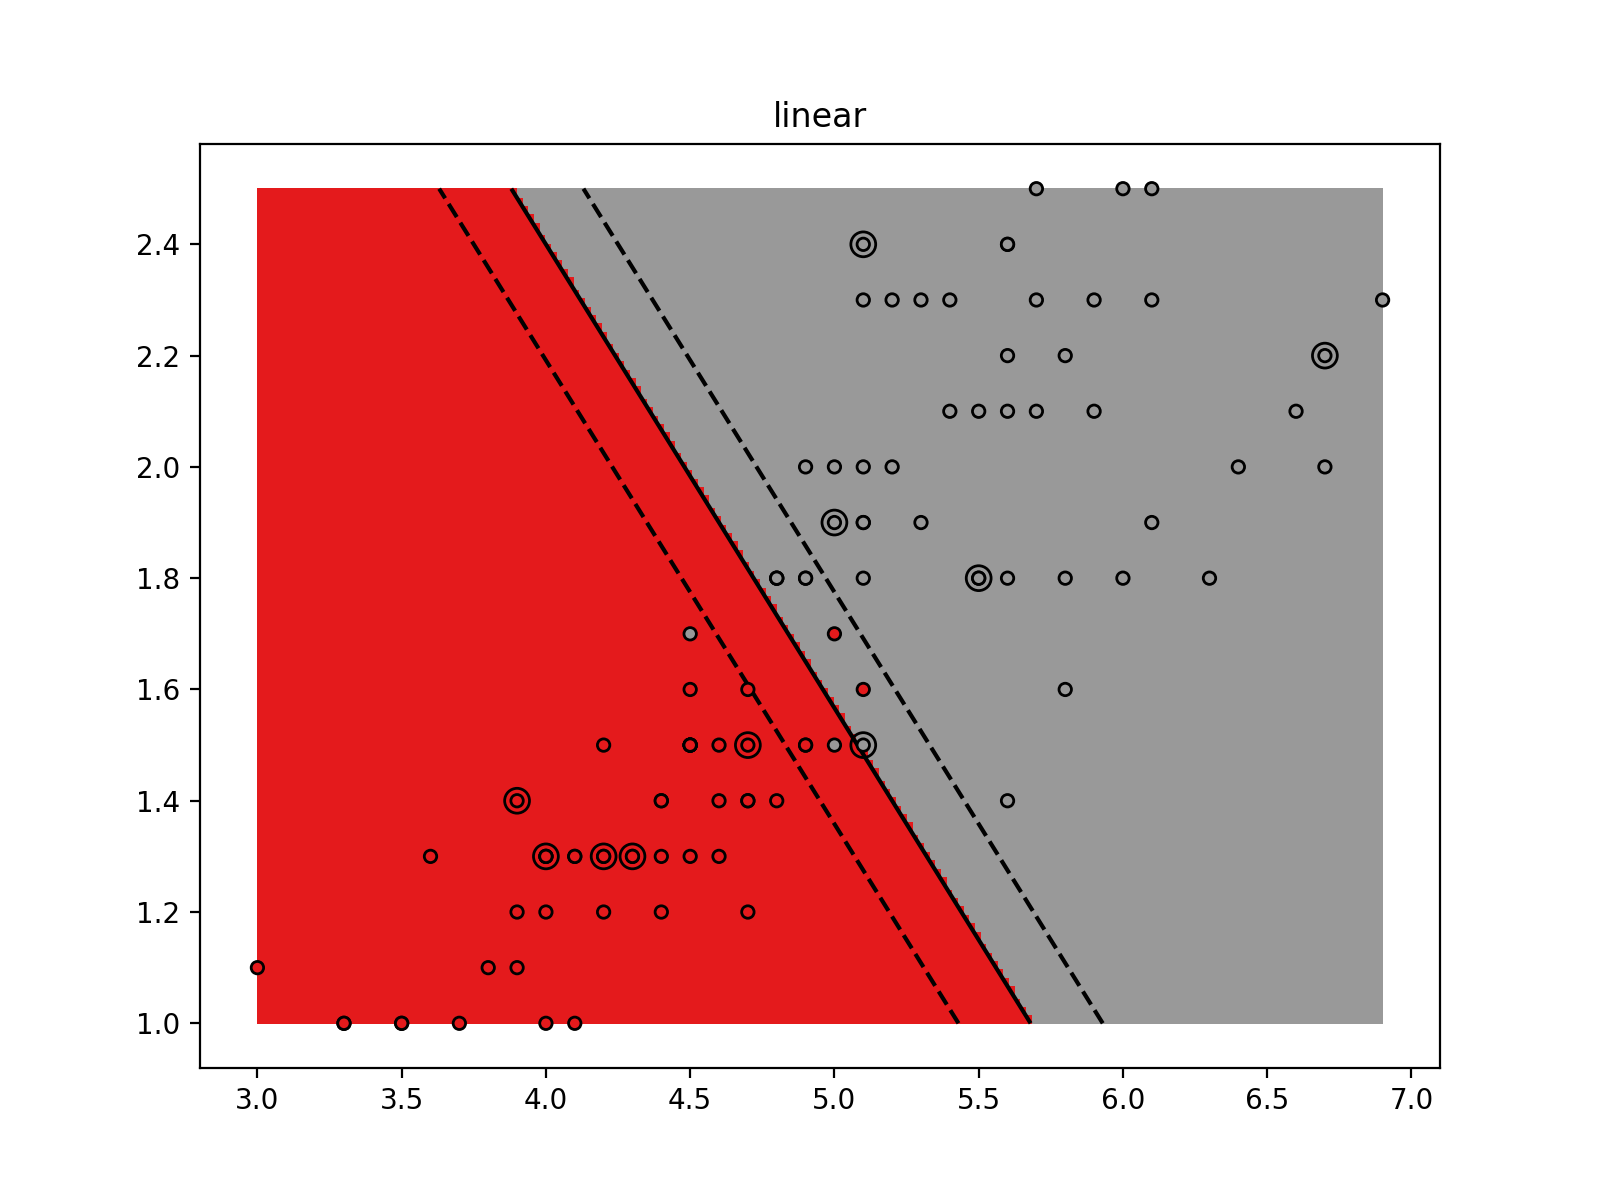

<IPython.core.display.Javascript object>


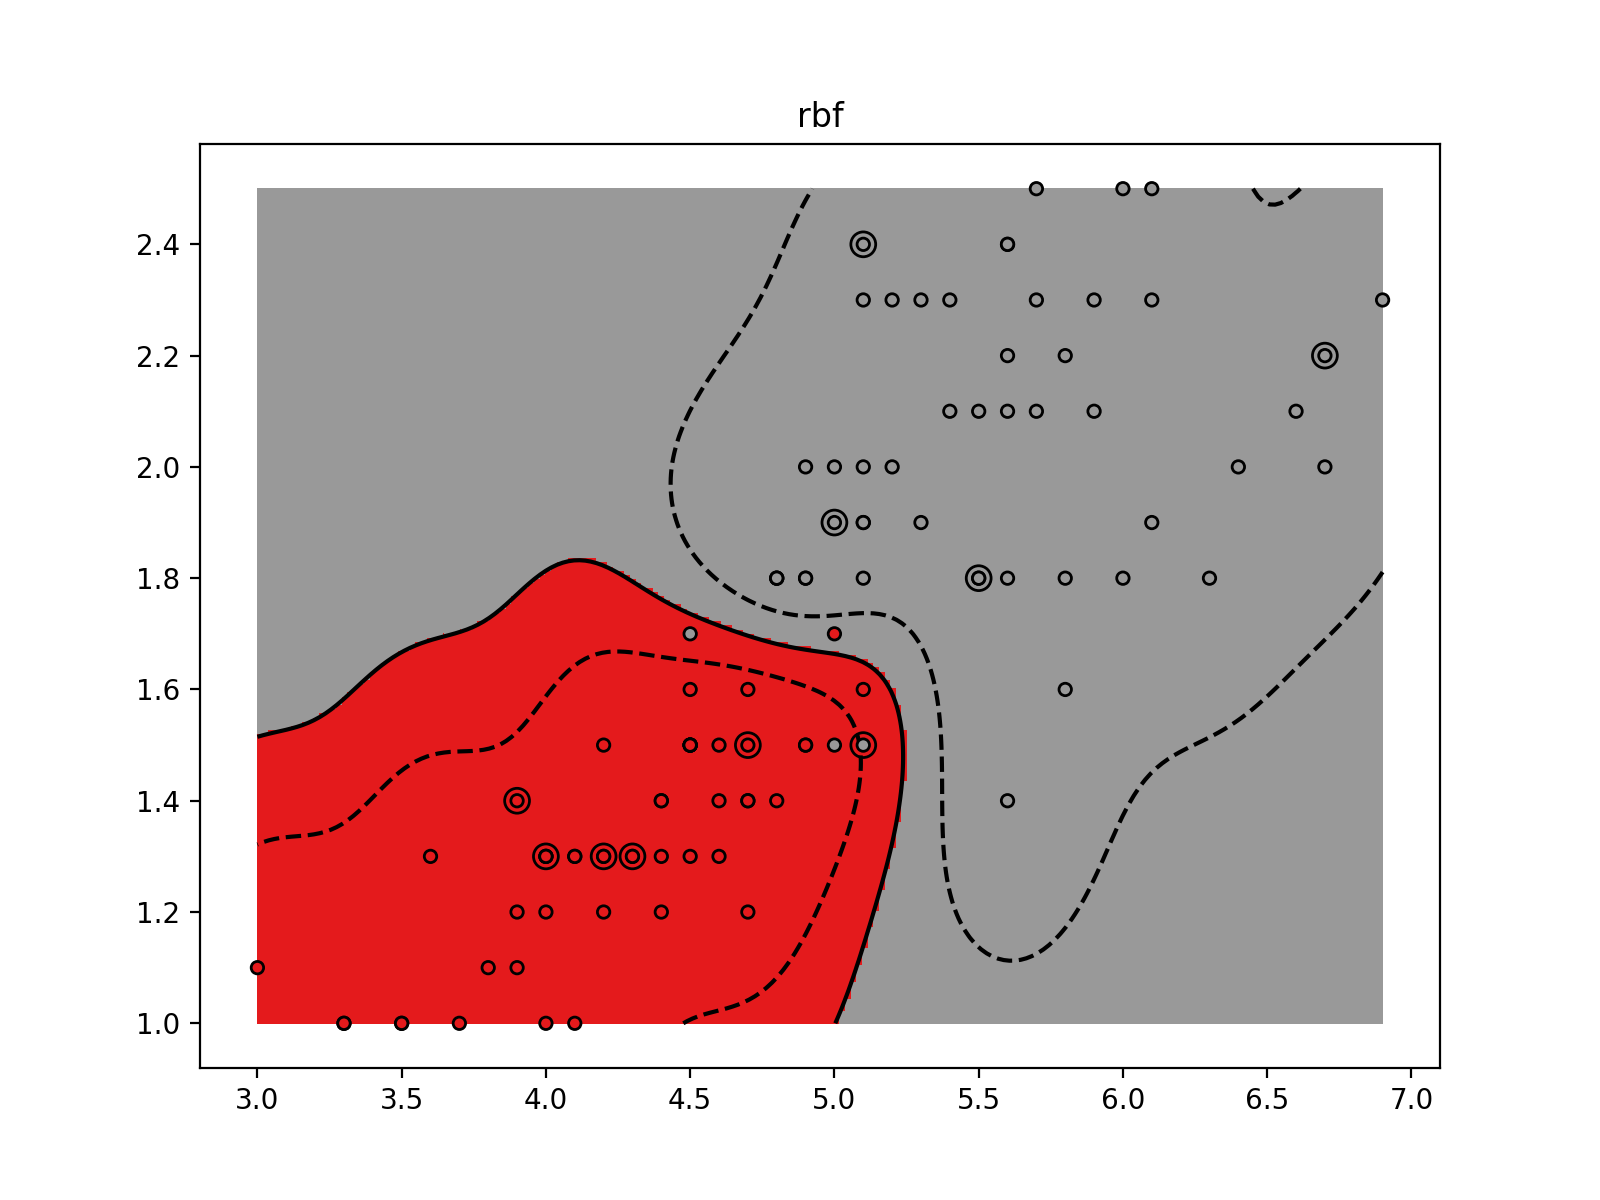

<IPython.core.display.Javascript object>


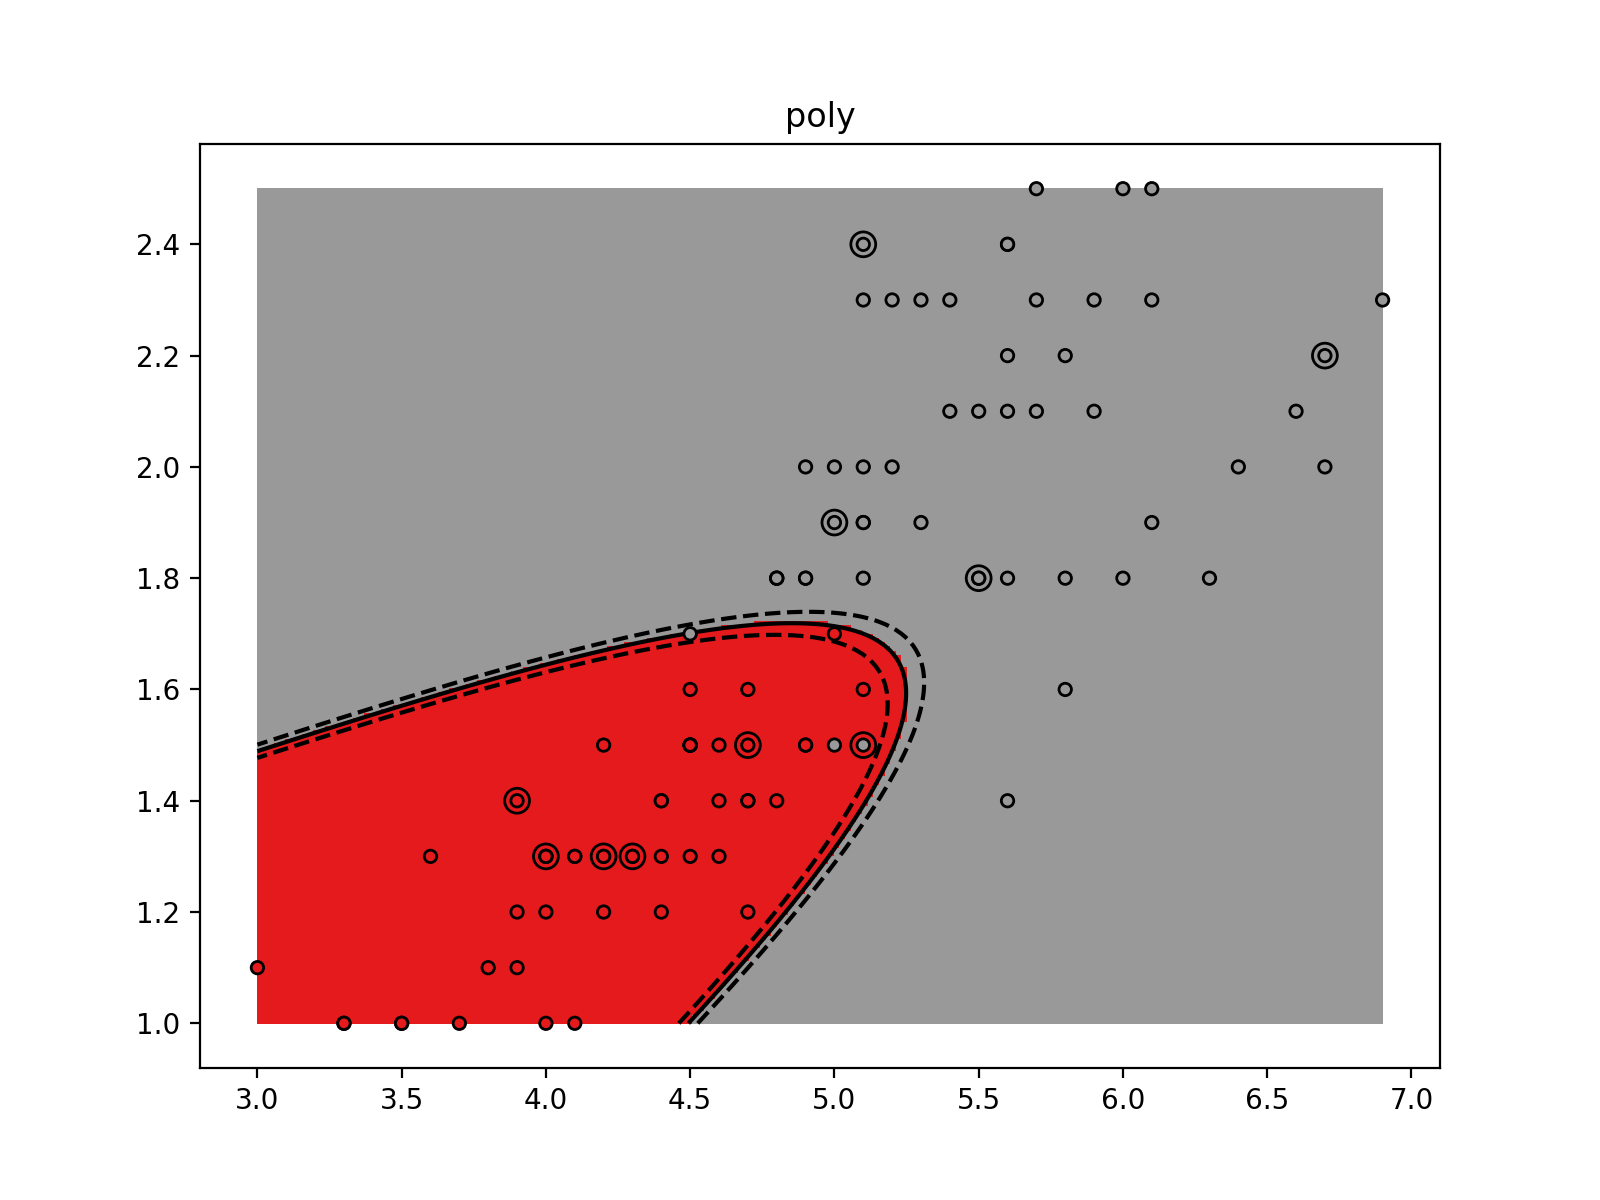

In [18]:
from sklearn import svm

# Limit data to last two classes/targets and first two features/attributes
X_lim = X[Y != 0, 2:4]
y_lim = Y[Y != 0]

# Shuffle data, since it is ordered by target
n_sample = len(X_lim)

np.random.seed(0)
order = np.random.permutation(n_sample)
X_lim = X_lim[order]
y_lim = y_lim[order].astype(np.float)

# Partition data set into training and testing data
X_train = X_lim[:int(.9 * n_sample)]
y_train = y_lim[:int(.9 * n_sample)]
X_test = X_lim[int(.9 * n_sample):]
y_test = y_lim[int(.9 * n_sample):]


# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(figsize=(8,6))
    plt.scatter(X_lim[:, 0], X_lim[:, 1], c=y_lim, zorder=10, cmap=plt.cm.Set1,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X_lim[:, 0].min()
    x_max = X_lim[:, 0].max()
    y_min = X_lim[:, 1].min()
    y_max = X_lim[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Set1)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()